In [ ]:
import numpy
print (numpy.version.full_version)
import numpy as np
a=np.array([0,1,2,3,4,5])
print(a)
print(a.ndim)
print(a.shape)

1.15.1
[0 1 2 3 4 5]
1
(6,)


In [7]:
b=a.reshape((3,2))
print(b)
print(b.ndim)
print(b.shape)
b[0][1]=77
print(b)

[[0 1]
 [2 3]
 [4 5]]
2
(3, 2)
[[ 0 77]
 [ 2  3]
 [ 4  5]]


In [8]:
print(a)

[ 0 77  2  3  4  5]


In [9]:
c=a.reshape((3,2)).copy()
print(c)

c[0][0]=100

print(c)
print(a)

[[ 0 77]
 [ 2  3]
 [ 4  5]]
[[100  77]
 [  2   3]
 [  4   5]]
[ 0 77  2  3  4  5]


In [10]:
d=np.array([2,3,4,33,44,])
print(d*2)
print(d**2)
#constrast to the ordinary python list
print([1,2,3,4,5]*2)

[ 4  6  8 66 88]
[   4    9   16 1089 1936]
[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]


In [16]:
a=np.array([1,5,6,3,7])
print(a)
print(a>5)
print(a[a>5])
a[a>5]=5
print(a)
a.clip(0,2)
print(a)

[1 5 6 3 7]
[False False  True False  True]
[6 7]
[1 5 5 3 5]
[1 5 5 3 5]


In [25]:
#Holding nonexisting values
c=np.array([1,2,4,np.NAN,5,7,9])
print(c)
print(np.isnan(c))
print(c[~np.isnan(c)])
print(np.mean(c[~np.isnan(c)]))

[ 1.  2.  4. nan  5.  7.  9.]
[False False False  True False False False]
[1. 2. 4. 5. 7. 9.]
4.666666666666667


In [1]:
#comparing the runtime
import timeit
normal_py_sec = timeit.timeit('sum(x*x for x in range(1000))', number=10000)
naive_np_sec = timeit.timeit(                'sum(na*na)', setup="import numpy as np; na=np.arange(1000)",number=10000) 
good_np_sec = timeit.timeit(                'na.dot(na)', setup="import numpy as np; na=np.arange(1000)", number=10000)
print("Normal Python: %f sec" % normal_py_sec) 
print("Naive NumPy: %f sec" % naive_np_sec)
print("Good NumPy: %f sec" % good_np_sec)

Normal Python: 1.110425 sec
Naive NumPy: 0.844206 sec
Good NumPy: 0.016028 sec


In [3]:
#learning Scipy
import numpy, scipy
print(scipy.version.full_version)
scipy.dot is numpy.dot

1.1.0


True

In [17]:
#Working with data
import scipy as sp 
data = sp.genfromtxt("D:\SarojKunwar\ML Books\BuildingMachineLearningSystemsWithPython-master\ch01\data\web_traffic.tsv", delimiter="\t")

In [19]:
print(data[:10])

[[1.000e+00 2.272e+03]
 [2.000e+00       nan]
 [3.000e+00 1.386e+03]
 [4.000e+00 1.365e+03]
 [5.000e+00 1.488e+03]
 [6.000e+00 1.337e+03]
 [7.000e+00 1.883e+03]
 [8.000e+00 2.283e+03]
 [9.000e+00 1.335e+03]
 [1.000e+01 1.025e+03]]


In [20]:
print (data.shape)

(743, 2)


In [24]:
x=data[:,0]
y=data[:,1]

In [25]:
sp.sum(sp.isnan(y))

8

In [26]:
x=x[~sp.isnan(y)]
y=y[~sp.isnan(y)]

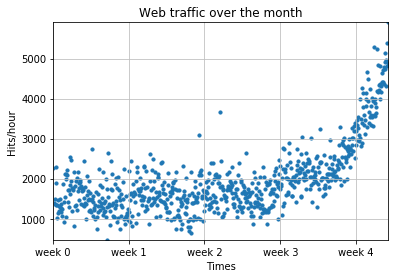

In [37]:
import matplotlib.pyplot as plt
plt.scatter(x,y,s=10)
plt.title("Web traffic over the month")
plt.xlabel("Times")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],               ['week %i' % w for w in range(10)]) 
plt.autoscale(tight=True) 
# draw a slightly opaque, dashed grid 
plt.grid(True, linestyle='-', color='0.75')
plt.show()

In [32]:
def error(f, x, y):
    return sp.sum((f(x)-y)**2)
fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full=True) 
print("Model parameters: %s" % fp1) 
print(residuals)

Model parameters: [  2.59619213 989.02487106]
[3.17389767e+08]


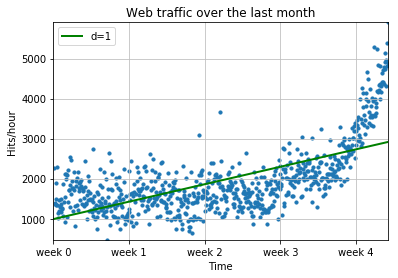

In [39]:
import matplotlib.pyplot as plt
plt.scatter(x, y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
fx = sp.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, f1(fx), linewidth=2,color="green")
plt.legend(["d=%i" % f1.order], loc="upper left")
# draw a slightly opaque, dashed grid
plt.grid(True, linestyle='-', color='0.75')
plt.show()

In [40]:
f2p = sp.polyfit(x,y,2)
print(f2p)

[ 1.05322215e-02 -5.26545650e+00  1.97476082e+03]


In [41]:
f2 = sp.poly1d(f2p)
print(error(f2,x,y))

179983507.8781792


C:\Users\pc\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """


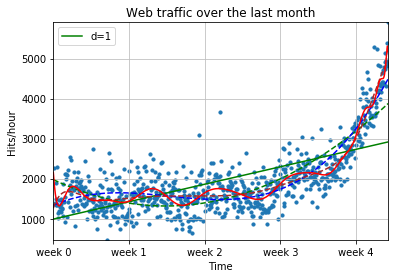

In [42]:
a= sp.poly1d(sp.polyfit(x,y,1))
b= sp.poly1d(sp.polyfit(x,y,2))
c= sp.poly1d(sp.polyfit(x,y,3))
d= sp.poly1d(sp.polyfit(x,y,10))
e= sp.poly1d(sp.polyfit(x,y,53))

plt.scatter(x, y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
fx = sp.linspace(0,x[-1], 1000) # generate X-values for plotting

plt.plot(fx, a(fx), linewidth=1.5,color="green")
plt.plot(fx, b(fx), linewidth=1.5,color="green",linestyle="dashed")
plt.plot(fx, c(fx), linewidth=1.5,color="blue",linestyle="dashed")
plt.plot(fx, d(fx), linewidth=1.5,color="brown",linestyle="dashed")
plt.plot(fx, e(fx), linewidth=1.5,color="red")
plt.legend(["d=%i" % a.order,"d=%i" % b.order,"d=%i" % c.order,"d=%i" % d.order,"d=%i" % e.order], loc="upper left")

plt.legend(["d=%i" % f1.order], loc="upper left")
# draw a slightly opaque, dashed grid
plt.grid(True, linestyle='-', color='0.75')
plt.show()

In [43]:
inflection = 3.5*7*24 # calculate the inflection point in hours
xa = x[:588] # data before the inflection point
ya = y[:588]
xb = x[588:] # data after
yb = y[588:]
fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))
fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)
print("Error inflection=%f" % (fa_error + fb_error))

Error inflection=132950348.197616


In [45]:
fbt2 = sp.poly1d(sp.polyfit(xb[:150], yb[:150], 2))
print("fbt2(x)= \n%s" % fbt2)

fbt2(x)= 
         2
0.07893 x - 84.69 x + 2.437e+04


In [46]:
print("fbt2(x)-100,000= \n%s" % (fbt2-100000))

fbt2(x)-100,000= 
         2
0.07893 x - 84.69 x - 7.563e+04


In [48]:
from scipy.optimize import fsolve
reached_max = fsolve(fbt2-100000, x0=800)/(7*24)
print("100,000 hits/hour expected at week %f" % reached_max[0])

100,000 hits/hour expected at week 9.837964
